# What codecademy has taught me about machine learning and data analysis.

This won't be a detailed document or a lesson, but rather a demonstration of the things taught by CodeCademy, and a very little bit of googling otherwise. This is NOT in any particular order, I sometimes learn something after analyzing data, but I'll back track and put it in.
I'll be using a dataset from Kaggle, a piece of data on heart disease.
https://www.kaggle.com/ronitf/heart-disease-uci

I have little to no knowledge of heart disease, but let's play around with it! :D

## Importing and analyzing metadata

In [1]:
# General imports for visual analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Let's import the data from a csv file and examine the columns.

In [2]:
df = pd.read_csv("heart.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [3]:
# Any NaN values? False means no N/A values, True means there are missing values.
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [4]:
# Descriptions of columns:

#age:     The person's age in years
#sex:     The person's sex (1 = male, 0 = female)
#cp:      The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol:    The person's cholesterol measurement in mg/dl
#fbs:     The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang:   Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
#slope:   The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca:      The number of major vessels (0-3)
#thal:    A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target:  Heart disease (0 = no, 1 = yes)

In [5]:
# View first 5 rows of the dataset.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I don't know what a lot of that means, but hey let's play with it. I'm going to make these columns a little more clear.

In [6]:
df.rename(columns={
    "cp": "chest_pain",
    "trestbps": "rest_blood_pressure",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "exang": "exercise_angina",
    "oldpeak": "st_depression",
    "ca": "major_vessels",
    "thal": "thal_disease",
    "thalach": "max_heart_rate",
    "target": "heart_disease",
    "slope": "st_slope"
}, inplace=True)

# I kept this at first, but later learned that keeping them as numbers is more useful.
#df.sex = df.sex.apply(lambda x: "female" if x == 0 else "male")
#df.heart_disease = df.heart_disease.apply(lambda x: "yes" if x == 1 else "no")

In [7]:
df.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Gives us a lot of interesting numbers.
df.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


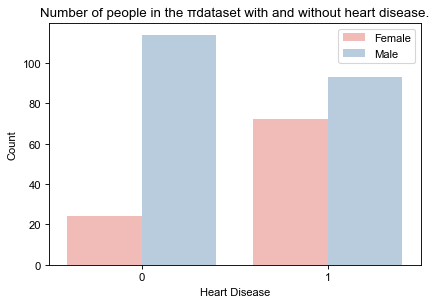

In [9]:
plt.figure(dpi=80)
sns.set_palette("Pastel1")
ax = sns.countplot(data=df, x='heart_disease', hue="sex")
ax.set_xlabel("Heart Disease")
ax.set_ylabel("Count")
ax.set_title("Number of people in the πdataset with and without heart disease.")
ax.legend(["Female", "Male"])
sns.set_style("whitegrid")

plt.show()

Some means and averages in relation to chest pain for patients with and without heart disease.

In [10]:
hd = df.groupby("heart_disease").chest_pain.mean().reset_index()
hd['Median Chest Pain #'] = df.groupby("heart_disease").chest_pain.median().reset_index().chest_pain
hd.rename(columns={
    "chest_pain": "Average Chest Pain #"
}, inplace=True)
hd

,heart_disease,Average Chest Pain #,Median Chest Pain #
0,0,0.478261,0
1,1,1.375758,2


Better yet, let's use that describe functions, but on patients with and without heart disease.

In [11]:
df_with_hd = df[df.heart_disease == 1].reset_index(drop=True)
df_without_hd = df[df.heart_disease == 0].reset_index(drop=True)
df_with_hd.drop(["heart_disease"], axis=1, inplace=True)
df_without_hd.drop(["heart_disease"], axis=1, inplace=True)

In [12]:
df_with_hd.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000


In [13]:
df_without_hd.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Let's take a look at thier differences. Positive values indicate a person with heart disease has that value more than a person without.

In [14]:
df_with_hd.describe() - df_without_hd.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,-4.104480,-0.262451,0.897497,-5.095520,-8.856653,-0.020026,0.144664,19.365217,-0.411331,-1.002477,0.427273,-0.803030,-0.422266
std,1.588569,0.117028,0.046301,-2.560331,4.098258,-0.019990,-0.036503,-3.424507,-0.151821,-0.519656,0.032310,-0.194566,-0.219009
min,-6.000000,0.000000,0.000000,-6.000000,-5.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.000000,-1.000000,1.000000,0.000000,-9.250000,0.000000,0.000000,24.000000,0.000000,-0.600000,0.000000,0.000000,0.000000
50%,-6.000000,0.000000,2.000000,0.000000,-15.000000,0.000000,1.000000,19.000000,-1.000000,-1.200000,1.000000,-1.000000,-1.000000
75%,-3.000000,0.000000,2.000000,-4.750000,-16.000000,0.000000,0.000000,16.000000,-1.000000,-1.500000,0.250000,-2.000000,-1.000000
max,-1.000000,0.000000,0.000000,-20.000000,155.000000,0.000000,0.000000,7.000000,0.000000,-2.000000,0.000000,0.000000,0.000000


We can see a few things here about heart diseased patients:
- Chest pain is significantly higher
- St depression is significantly lower
- St slope is quite higher.
- Major vessels is significantly lower.
- Thal disease seems fairly lower.

We'll keep these things in mind for analysis later.

## Exploratory Analysis

Here I was just playing around with some graphs.

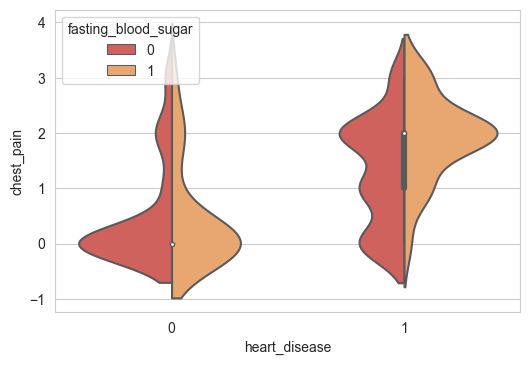

In [15]:
plt.figure(dpi = 100)
sns.set_palette("Spectral")
sns.violinplot(x="heart_disease", data=df, y="chest_pain", hue="fasting_blood_sugar", split=True)
plt.show()

# Where 0 is < 120 mg/dl blood sugar, and 1 is > 120 mg/dl blood sugar.

This is quite interesting. There's a few things to take away from the graph above.
- Heart disease patients are reporting a fairly uniform amount of of chest pain.
 - With potentially more on the higher end.
- Non-Heart disease patients typically don't report any chest pain.
- Patients who have heart disease and a high blood sugar level typically report higher levels of pain.
- Patients who do not have heart disease but have a high blood sugar level are not reporting high levels of pain.

It is as if blood sugar is causing more pain if they have heart disease. Let's investigate this further!

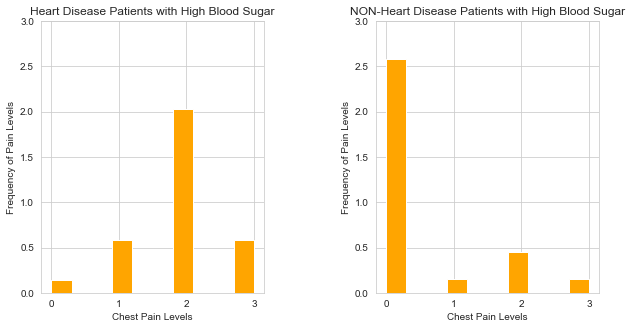

In [16]:
df_high_sugar_with_disease = df[(df.fasting_blood_sugar == 1) & (df.heart_disease == 1)].reset_index()
df_high_sugar_without_disease = df[(df.fasting_blood_sugar == 1) & (df.heart_disease == 0)].reset_index()
#df_low_sugar_with_disease = df[(df.fasting_blood_sugar == 0) & (df.heart_disease == 1)].reset_index()
#df_low_sugar_without_disease = df[(df.fasting_blood_sugar == 0) & (df.heart_disease == 0)].reset_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_high_sugar_with_disease.chest_pain, color="orange", density=True)
plt.title("Heart Disease Patients with High Blood Sugar")
plt.xlabel("Chest Pain Levels")
plt.ylabel("Frequency of Pain Levels")
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

plt.subplot(1, 2, 2)
plt.hist(df_high_sugar_without_disease.chest_pain, color="orange", density=True)
#plt.hist(df_low_sugar_without_disease.chest_pain, color="blue", density=True, alpha=0.2)

plt.title("NON-Heart Disease Patients with High Blood Sugar")
plt.xlabel("Chest Pain Levels")
plt.ylabel("Frequency of Pain Levels")
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

plt.subplots_adjust(wspace=.5)
plt.show()

Nice. I may be able to use the combination of higher levels of chest pain plus high blood sugar to help determine heart disease! I'm pretty stoked myself! I'll come back to this later, as I currently don't have the knowledge to analyze this further, as it is more categorical.

Let's plot a bunch of stuff against each other.

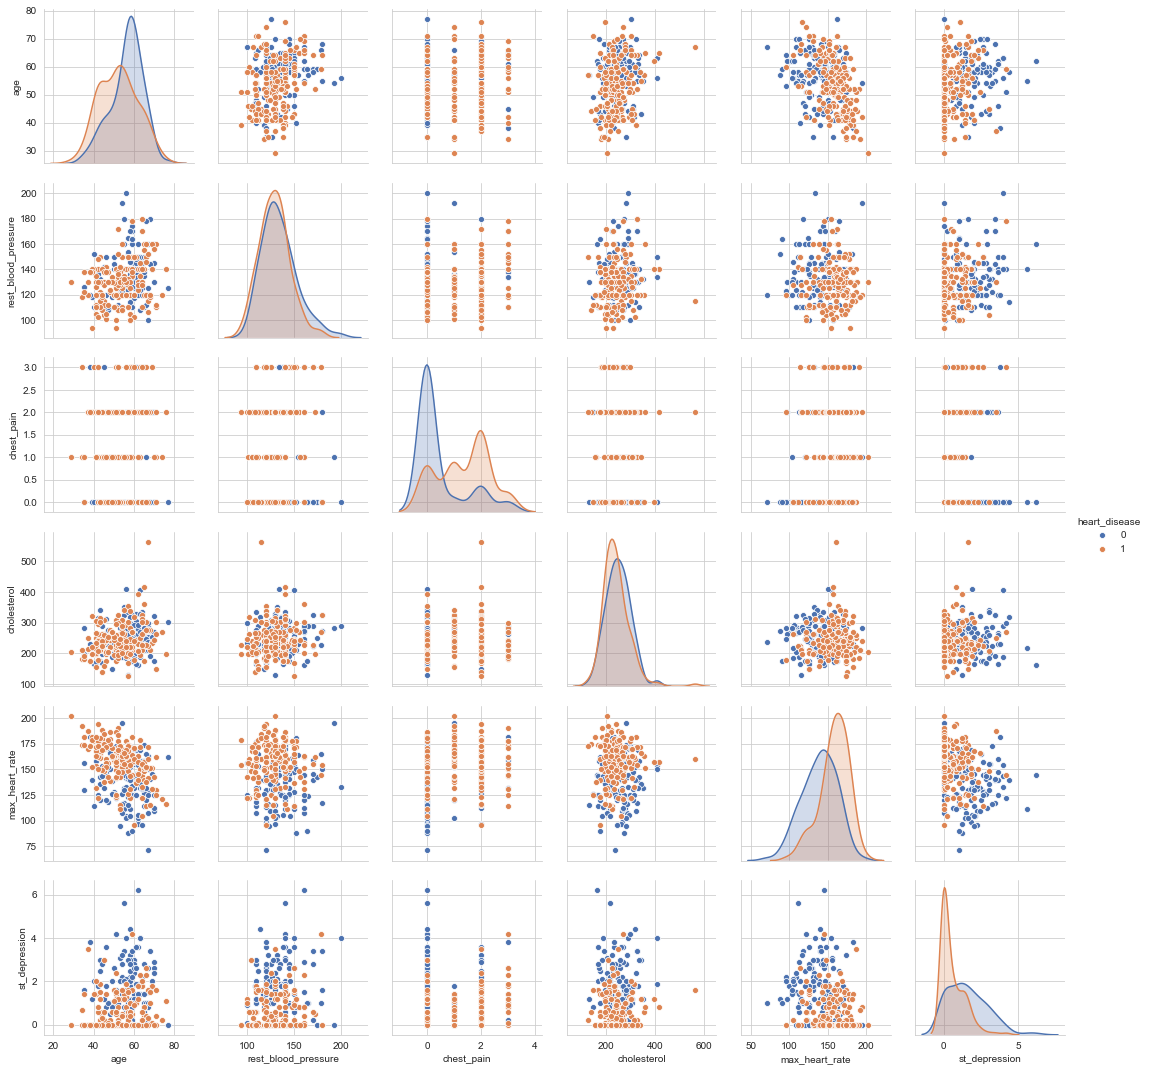

In [17]:
# WARNING: This takes a minute.
sns.set_palette("deep")
sns.pairplot(data=df, hue="heart_disease", vars=["age", "rest_blood_pressure", "chest_pain", "cholesterol", "max_heart_rate", "st_depression"])
plt.show()

It is a known fact that your maximum heart rate decreases with age. Let's look at the distribution of data for the max heart rate and age.

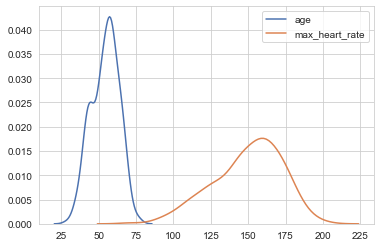

In [18]:
sns.kdeplot(df.age)
sns.kdeplot(df.max_heart_rate)
plt.show()

Cool, they're fairly binomial. This means I can use a decent amount of statistical functions on it, but I don't really intend to.

## Linear Regression

I'll go ahead and do a linear regression on Max Heart Rate versus Age, but isolated by whether they have heart disease or not. I don't expect linear regressions to do any justice here.

In [19]:
# Creating dataframes with and without the heart disease.

# With heart disease.
df_with_disease = df[df.heart_disease == 1].reset_index()
age_with_disease = df_with_disease.age.values

# Without heart disease.
df_without_disease = df[df.heart_disease == 0].reset_index()
age_without_disease = df_without_disease.age.values

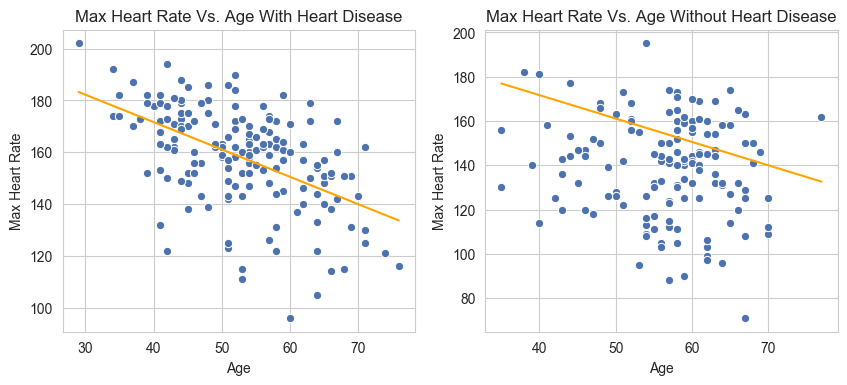

In [20]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 4), dpi = 100)

# Scatter Plot for people with heart disease
plt.subplot(1, 2, 1)
sns.set_palette("deep")
sns.scatterplot(data=df_with_disease, x="age", y="max_heart_rate")
plt.title("Max Heart Rate Vs. Age With Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

# Linear Model for plot 1
model1 = LinearRegression()
x1 = age_with_disease.reshape(-1, 1)
model1.fit(x1, df_with_disease.max_heart_rate)
predicted_y1 = model1.predict(x1)

sns.lineplot(age_with_disease, predicted_y1, color="orange")

# Scatter Plot for people without heart disease
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_without_disease, x="age", y="max_heart_rate")
plt.title("Max Heart Rate Vs. Age Without Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

# Linear Model for plot 1
model2 = LinearRegression()
x2 = age_without_disease.reshape(-1, 1)
model2.fit(x2, df_without_disease.max_heart_rate)
predicted_y2 = model1.predict(x2)

sns.lineplot(age_without_disease, predicted_y2, color="orange")
plt.show()

Does it decrease faster with heart disease? It's hard to tell with this graph alone. Obviously, a linear fit to this graph isn't doing much justice. What's the slope and coefficient? Also, What's the R^2 value? (How well does this line fit the data?) The closer to +1 or -1, the better, 0 being a very unfit model.

In [21]:
print("Model 1 with heart disease has slope: " + str(model1.coef_) + ", and y-intercept: " + str(model1.intercept_))
print("Model 1 has a R^2 value of: " + str(model1.score(x1, df_with_disease.max_heart_rate)))
print()
print("Model 2 without heart disease has slope: " + str(model2.coef_) + ", and y-intercept: " + str(model2.intercept_))
print("Model 2 has a R^2 value of: " + str(model2.score(x2, df_without_disease.max_heart_rate)))


Model 1 with heart disease has slope: [-1.05561898], and y-intercept: 213.88346440997685
Model 1 has a R^2 value of: 0.2764664138353604

Model 2 without heart disease has slope: [-0.37678644], and y-intercept: 160.42810800798637
Model 2 has a R^2 value of: 0.017622750828081513


As we can see, both of the two linear models don't fit the data very well. However, the first model with heart disease fits better than the one without the disease. Both models are not strong enough to make any conclusions, but **if it was a good enough model**, with the current predictions, it would show that people's max heart rate decreases faster if they have heart disease.

## Multi-Linear Regression

I later learn of something that could have saved me quite a bit of time on linear regressions. The following command allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. 

In [22]:
df.corr()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease,heart_disease
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


We want to make a multi-linear regression model on correlations that seem to be strong in relation to heart disease, so we'll look at the last column and pick values closer to `1` and `-1`. I decided to include features above `0.3` and below `-0.3`.

In [23]:
features = ["exercise_angina", "st_depression", "major_vessels", "thal_disease", "chest_pain", "max_heart_rate", "st_slope"]
all_features = df.columns[:-1]

Lets go ahead and train a linear model based off of the features I chose, and then all of the features in the dataset. First, we'll split up the data into a training set and a testing set. We'll choose 80% of our data to be the training data, and 20% of our data to be the testing set.

In [24]:
# Grabbing the values from the columns, as well as the heart disease column, the value we want to predict.
x1 = df[features]
x2 = df[all_features]
y = df.heart_disease

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the data up into training and testing sets for both feature sets.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, train_size = 0.8, test_size = 0.2)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, train_size = 0.8, test_size = 0.2)

# Model 1 is the features I chose.
model1 = LinearRegression()
model1.fit(x1_train, y1_train)

# Model 2 contains all of the features.
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's see how accurate it is by calculating the r^2 score on both the training and testing sets. Crossing fingers!

In [26]:
print("Selected features:")
print(model1.score(x1_train, y1_train))
print(model1.score(x1_test, y1_test))
print()
print("All Features:")
print(model2.score(x2_train, y2_train))
print(model2.score(x2_test, y2_test))

Selected features:
0.46169004722737106
0.5249717198348243

All Features:
0.5041703778438469
0.5455608591284598


Hey! That's an improvement over just one linear regression, but.. unfortunately, it's not really better than just guessing. We really want a value at least over 0.70. Looks like including all of the features was better than the ones we selected.

Let's plot that.

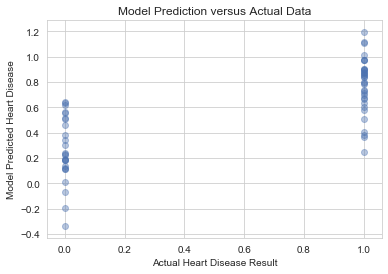

In [27]:
y_predicted = model2.predict(x2_test)
plt.scatter(y2_test, y_predicted, alpha=0.4)
plt.title("Model Prediction versus Actual Data")
plt.xlabel("Actual Heart Disease Result")
plt.ylabel("Model Predicted Heart Disease")
plt.show()

This allows us to see the variation of the model and the actual data. Actually, I noticed that the model is not predicting only 0's and 1's. I have an idea..

In [28]:
print(y_predicted)

[ 1.11276278  0.58148581  0.40326239 -0.07065764  0.18444519  0.85317121
  0.37776695  0.61457193  0.97666912  0.80170815  0.73380709  0.64185964
  0.83487387  0.18774281  0.11242247  0.2984344   0.13877105  0.89353522
  0.50733135  0.66949344  0.5628589   0.78540043  1.19375086  1.00852596
  0.3643802   0.5035375   0.24333206  0.19272018  0.97275413  0.51816006
  0.23043808  0.86675477 -0.19798115  0.90195533  0.38334125  0.11661139
  0.90481038  0.66640502  0.85529835  0.55828786  0.72487695  0.83756187
  0.97064267  0.88143074  0.59931008  0.87155812  0.79325197  0.12176528
  0.22193901  0.3408749   0.23947425  0.4638607   0.18452672  0.63263376
  1.10753295  0.69357554  0.0088453  -0.33820837  0.63729398  0.89600076
  0.70990014]


Since 0 means you don't have heart disease and 1 means you do, what would something like .50 mean?
Let's round this to the nearest 0 or 1, which is no or yes. Unfortunately I don't know if the score function can find an r^2 value since my predicted rounded output is not taken as a parameter. I'll have to make the r^2 function myself.

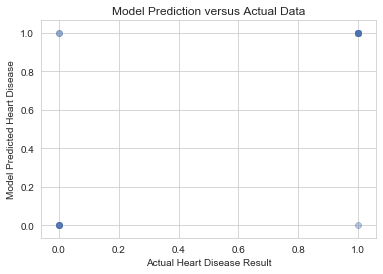

In [29]:
plt.scatter(y2_test, y_predicted.round(), alpha=0.1)
plt.title("Model Prediction versus Actual Data")
plt.xlabel("Actual Heart Disease Result")
plt.ylabel("Model Predicted Heart Disease")
plt.show()

That is looking really promising. We have some errors in the model, but how accurate is this? I looked up the formula for calculating R^2 and translated it into the function below. Just incase, I ran the score method to compare if I did it right.

In [30]:
def r_squared(y, y_predicted):
    if len(y) != len(y_predicted):
        return 0
    
    sse = 0
    ssto = 0
    y = np.array(y)
    y_predicted = np.array(y_predicted)
    y_bar = y.mean()
    
    for i in range(len(y)):
        sse += (y[i] - y_predicted[i]) ** 2
        ssto += (y[i] - y_bar) ** 2
    return 1 - sse/ssto

In [31]:
print(r_squared(y2_test, y_predicted))
print(model2.score(x2_test, y2_test))

0.5455608591284595
0.5455608591284598


Perfect! Let's try that, but with the rounded prediction values.

In [32]:
print(r_squared(y2_test, y_predicted.round()))

0.26263736263736215


THE MODEL HAS IMPROVED! WOO! At the time of writing, I got `0.6445`.
**But not so fast.** After I ran the entire project a few more times, my rounded model showed that it performed worse every time. That really got my hopes up. I somewhat regret choosing this dataset, It's a hard one to play with considering it is something complex, and there are only 303 sets of data. This can cause lots of variance, and not-so-accurate results due to little amounts of data. But I've dug too deep to go back now. Anyways, moving on!

## K Nearest Neighbors

First I'm going to normalize all of the data so that each feature holds the same weight for the classification. I decided to use regular normalize scaling, but there are many others, such as min max, etc. I left a comparison of min/max and normalize to visualize.

In [33]:
from sklearn.preprocessing import minmax_scale
normalized_data = minmax_scale(df)
df_normalized = pd.DataFrame(normalized_data, columns=df.columns.values)
df_normalized.drop(["heart_disease"], axis=1, inplace=True)
df_normalized.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thal_disease
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [34]:
#sns.pairplot(df_normalized)

In [35]:
#from sklearn.preprocessing import normalize
#normalized_data = normalize(df)
#df_normalized = pd.DataFrame(normalized_data, columns=df.columns.values)
#df_normalized.drop(["heart_disease"], axis=1, inplace=True)
#df_normalized.head()

In [36]:
#sns.pairplot(df_normalized)

K Nearest Neighbors Model. Let's try to predict heart disease using this.
I'm going to select all attributes.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 7)

labels = df.heart_disease.reset_index(drop=True)
train_data, validation_data, train_label, validation_label = train_test_split(df_normalized, labels, test_size=0.2)
knn.fit(train_data, train_label)
print(knn.score(validation_data, validation_label))
print(knn.score(train_data, train_label))

0.7377049180327869
0.871900826446281


Hey that's actually pretty great! Let's try testing every k from 1 to 100, to see what N contains the highest score.
We'll test 50 randomized sets and plot their scores based on the number of neighbors they have. This won't be very readable, so let's take the average of all this and plot that as a single line afterward.
###### This takes a minute.

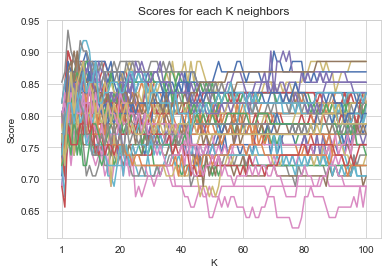

In [38]:
sets = 50
size = 100
scores = []
for k in range(sets):
    train_data, validation_data, train_label, validation_label = train_test_split(df_normalized, labels, test_size=0.2)
    score = []
    for i in range(size):
        knn = KNeighborsClassifier(n_neighbors = (i+1))
        knn.fit(train_data, train_label)
        score.append(knn.score(validation_data, validation_label))
    scores.append(score)

for j in range(sets):
    plt.plot(list(range(1, size+1)), scores[j])
plt.title("Scores for each K neighbors")
plt.xlabel("K")
plt.ylabel("Score")
plt.xticks([1, 20, 40, 60, 80, 100])
plt.show()

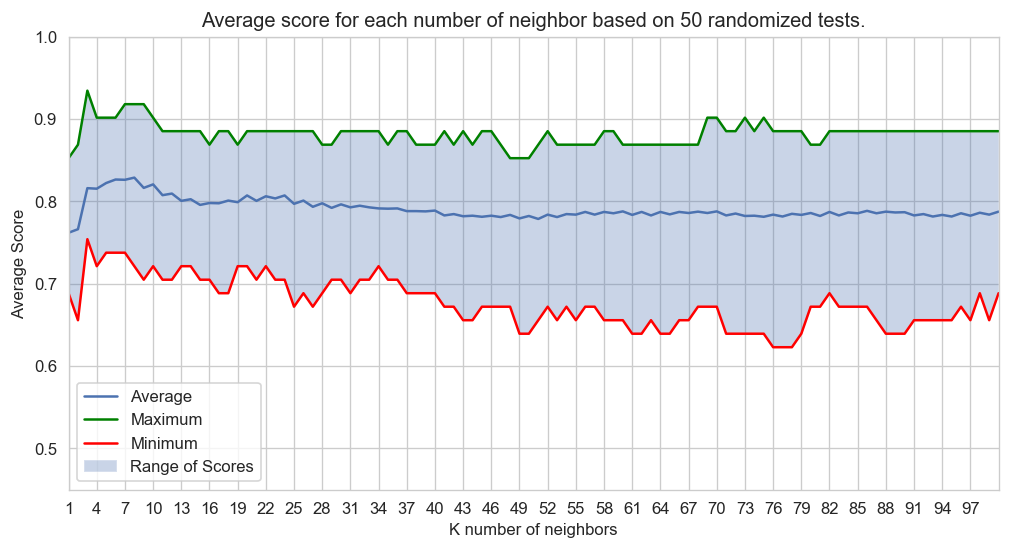

In [42]:
average = []
min_array = []
max_array = []


for i in range(len(scores[0])):
    total = 0
    min = 2
    max = -1
    for j in range(len(scores)):
        total += scores[j][i]
        if scores[j][i] < min:
            min = scores[j][i]
        if scores[j][i] > max:
            max = scores[j][i]
    average.append(total / len(scores))
    min_array.append(min)
    max_array.append(max)

    
plt.figure(figsize=(10, 5), dpi=120)
plt.plot(list(range(1, len(scores[0]) + 1)), average)
plt.plot(list(range(1, len(scores[0]) + 1)), max_array, color="green")
plt.plot(list(range(1, len(scores[0]) + 1)), min_array, color="red")
plt.fill_between(list(range(1, len(scores[0]) + 1)), min_array, max_array, alpha=0.3)

plt.legend(["Average", "Maximum", "Minimum", "Range of Scores"])
plt.axis([1, 100, .45, 1])
plt.xlabel("K number of neighbors")
plt.ylabel("Average Score")
plt.xticks(list(range(1, 100, 3)))
plt.title("Average score for each number of neighbor based on " + str(sets) + " randomized tests.")
plt.show()

Our max K value is at....:

In [40]:
np_average = np.array(average)
best_score = np_average.max()
print("The highest score on average: " + str(best_score))
print("The best number of neighbors: " + str(average.index(best_score)))
print("Absolute minimum: " + str(np.array(min_array).min()))
print("Absolute maximum: " + str(np.array(max_array).max()))

The highest score on average: 0.8288524590163935
The best number of neighbors: 7
Absolute minimum: 0.6229508196721312
Absolute maximum: 0.9344262295081968


Hey, this is actually a good model! I conducted this test again, only using 10,000 sets (repeated experiments) to be very sure of the results. At it's worst, our model is a little better than guessing, at around 55.74% as absolute minimum. On average, our model is 81.90%, and at it's best, we're looking at upwards of 96.72% success! The reason for the variance is because we randomized the train and validation data a bunch of times, so some luck is involved, and there are only 300 records of the data, so there will be a good bit of variance. The more data, the more refined our algorithm would be. Regardless, an average of about 82% means that the model is generally aiming pretty high.